# COVID-19 BRASIL 

- Utilizando os datasets que do JOHNS HOPKINS link: https://github.com/CSSEGISandData/COVID-19, foram feitas análises e criado um dataset apenas com os dados da pandemia no Brasil.

## 1.0 Importando as bibliotecas e carregando os arquivos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
url_2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
url_3= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
dados_covid19 = pd.read_csv(url, sep=',')

In [6]:
dados_deaths_covid19 = pd.read_csv(url_2, sep=',')

In [7]:
dados_recovered_covid19 = pd.read_csv(url_3, sep=',')

## 2.0 Tratando os dados do dataset dos casos confirmados da covid 19.

In [8]:
dados_covid19 = dados_covid19.drop(columns=['Province/State', 'Lat','Long'])
dados_covid19 = dados_covid19.set_index('Country/Region')
dados_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836


In [9]:
brasil_covid19 = dados_covid19.loc['Brazil'].to_frame()
brasil_covid19['novos_casos'] = brasil_covid19['Brazil'].diff()

In [10]:
brasil_covid19 = brasil_covid19.rename({'Brazil': 'total_casos_confirmados'}, axis = 1)

In [11]:
brasil_covid19.head()

,total_casos_confirmados,novos_casos
1/22/20,0,NaN
1/23/20,0,0.0
1/24/20,0,0.0
1/25/20,0,0.0
1/26/20,0,0.0


- Visualizando o crescimento dos casos do Brasil.

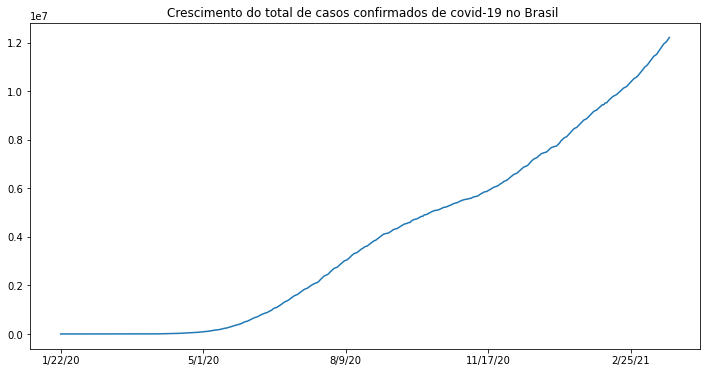

In [12]:
brasil_covid19['total_casos_confirmados'].plot(figsize=(12,6))
plt.title('Crescimento do total de casos confirmados de covid-19 no Brasil ')
plt.show()

In [13]:
# pd.set_option('display.max_rows',500)
brasil_covid19.head()

,total_casos_confirmados,novos_casos
1/22/20,0,NaN
1/23/20,0,0.0
1/24/20,0,0.0
1/25/20,0,0.0
1/26/20,0,0.0


- Visializando o crescimento diário  dos novos casos.

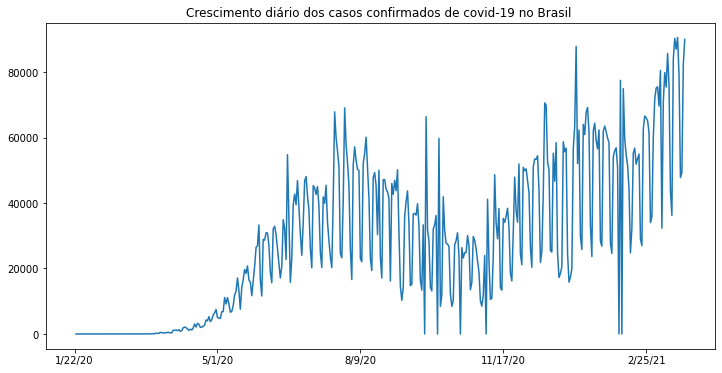

In [14]:
brasil_covid19['novos_casos'].plot(figsize=(12,6))
plt.title('Crescimento diário dos casos confirmados de covid-19 no Brasil ')
plt.show()

## 2.1 Tratando os dados do dataset dos óbitos confirmados da covid-19. 

In [15]:
dados_deaths_covid19 = dados_deaths_covid19.groupby('Country/Region').sum()
dados_deaths_covid19 = dados_deaths_covid19.drop(columns=['Lat','Long'],axis=1)

In [16]:
brasil_covid19['total_mortes'] = dados_deaths_covid19.loc['Brazil']

In [17]:
brasil_covid19.head()

,total_casos_confirmados,novos_casos,total_mortes
1/22/20,0,NaN,0
1/23/20,0,0.0,0
1/24/20,0,0.0,0
1/25/20,0,0.0,0
1/26/20,0,0.0,0


- Criando a coluna referente ao crescimento diário das mortes por covid-19.

In [18]:
brasil_covid19['mortes_por_dia'] = brasil_covid19['total_mortes'].diff()

- Visualizando o crescimento do total de óbitos no Brasil pela covid-19.

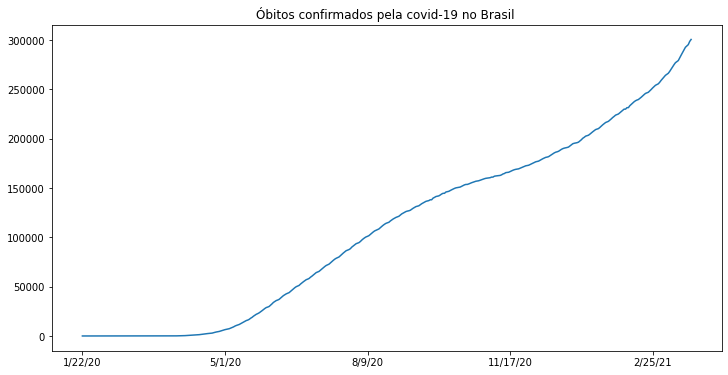

In [19]:
plt.figure(figsize=(12,6))
brasil_covid19['total_mortes'].plot()
plt.title('Óbitos confirmados pela covid-19 no Brasil ')
plt.show()

- Visualizando os óbitos por dia durante a pandemia covid-19 no Brasil. 

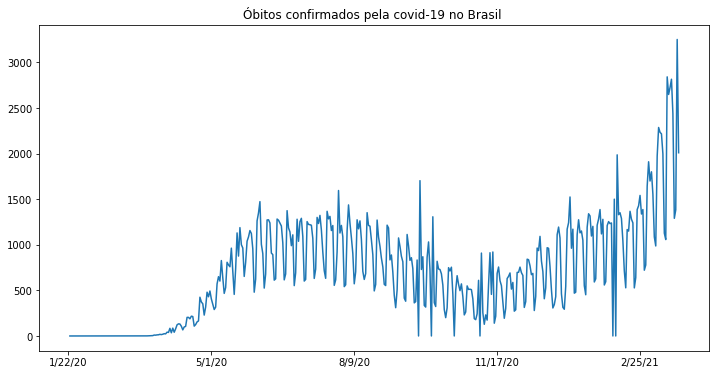

In [20]:
plt.figure(figsize=(12,6))
brasil_covid19['mortes_por_dia'].plot()
plt.title('Óbitos confirmados pela covid-19 no Brasil ')
plt.show()

## 2.2 Tratando os dados do dataset dos recuperados da covid-19.

In [21]:
dados_recovered_covid19 = dados_recovered_covid19.drop(columns=['Province/State', 'Lat','Long'])
dados_recovered_covid19 = dados_recovered_covid19.set_index('Country/Region')

In [22]:
brasil_covid19['total_recuperados'] = dados_recovered_covid19.loc['Brazil']

In [23]:
brasil_covid19['recuperados_por_dia'] = brasil_covid19['total_recuperados'].diff()

In [24]:
brasil_covid19.head()

,total_casos_confirmados,novos_casos,total_mortes,mortes_por_dia,total_recuperados,recuperados_por_dia
1/22/20,0,NaN,0,NaN,0,NaN
1/23/20,0,0.0,0,0.0,0,0.0
1/24/20,0,0.0,0,0.0,0,0.0
1/25/20,0,0.0,0,0.0,0,0.0
1/26/20,0,0.0,0,0.0,0,0.0


- Visualizando o crescimento do total dos recuperados no Brasil da covid-19.

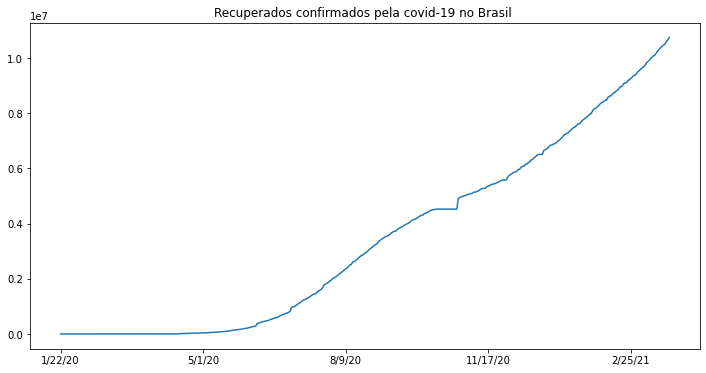

In [25]:
plt.figure(figsize=(12,6))
brasil_covid19['total_recuperados'].plot()
plt.title('Recuperados confirmados pela covid-19 no Brasil ')
plt.show()

- Visualizando os recuperados por dia no Brasil da covid-19.

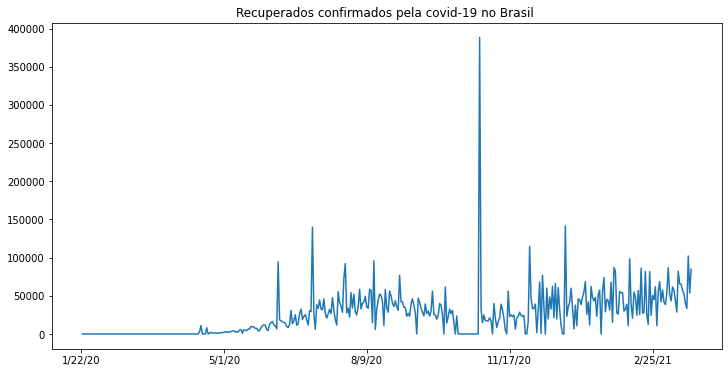

In [26]:
plt.figure(figsize=(12,6))
brasil_covid19['recuperados_por_dia'].plot()
plt.title('Recuperados confirmados pela covid-19 no Brasil ')
plt.show()

In [27]:
brasil_covid19.describe().round(2)

,total_casos_confirmados,novos_casos,total_mortes,mortes_por_dia,total_recuperados,recuperados_por_dia
count,428.00,427.00,428.00,427.00,428.00,427.00
mean,3976281.23,28618.29,109600.57,704.18,3444427.55,25175.95
std,3687388.74,23352.85,89624.20,561.14,3325520.27,30561.33
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,144113.75,6544.00,9810.25,231.00,58310.25,1.00
50%,3594072.50,26051.00,114497.00,654.00,2930875.00,20768.00
75%,6636683.00,46786.00,177527.50,1112.00,5914517.50,39084.00
max,12220011.00,90570.00,300685.00,3251.00,10750131.00,388340.00


## 3.0 Calculando a taxa de letalidade da covid-19 no Brasil.

In [28]:
brasil_covid19.sum()

total_casos_confirmados    1.701848e+09
novos_casos                1.222001e+07
total_mortes               4.690904e+07
mortes_por_dia             3.006850e+05
total_recuperados          1.474215e+09
recuperados_por_dia        1.075013e+07
dtype: float64